In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
## the length
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0167-09.TAUX.nc')
lont = data1.variables['ULONG'][:600,1100:1600]
latt = data1.variables['ULAT'][:600,1100:1600]
latt[latt == -1.0] = np.nan
a = np.arange(0,600)
import math
wholedis = np.zeros(600)
for j in a:
    wholedis[j] = 111.34* math.cos(math.radians(latt[:,200][j]))

In [3]:
latt[426,:]

masked_array(data=[-60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03926739, -60.03926739, -60.03926739, -60.03926739,
                   -60.03

In [4]:
wholedis = wholedis * 1000 # 地球一度的距离(m)

In [5]:
# each layer depth (m)
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0330-12.dz.nc')
lev1 = data1.variables['dz'][:]/100

In [6]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0305-09.VVEL.nc')
plotvar = data.variables['VVEL'][0,:,:]
v = plotvar[:,426,1100:1600]

##############################################
plotvar[plotvar == -0.009999999776482582]= np.nan
plotvar[plotvar == -1.0]= np.nan
where_are_nan = np.isnan(plotvar)
plotvar[where_are_nan] = 0
v = v/100 # m/s

In [7]:
v.shape

(62, 500)

In [8]:
data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0305-09.SALT.nc')
plotvar = data.variables['SALT'][0,:,:]
salinity = plotvar[:,426,1100:1600]

##############################################
salinity[salinity == -1000.0] = np.nan

In [9]:
###################################
#####  volume transport
a = np.arange(0,500)
A1= np.zeros([62,500])
for j in a:
    A1[:,j] = v[:,j]* lev1[:]* 0.1 * wholedis[426] * salinity[:,j]
#####unit (m^3/s)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/numpy/ma/core.py:1015: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [10]:
A1[A1>100000000000000]=0



In [11]:
A1[A1>100000000000000]=0
final = np.nansum(A1,axis=1)

In [12]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/depth.nc')
A = data1.variables['z_t'][:]/100

In [13]:
streamSV = final/1000000

In [14]:
total = np.nansum(streamSV)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


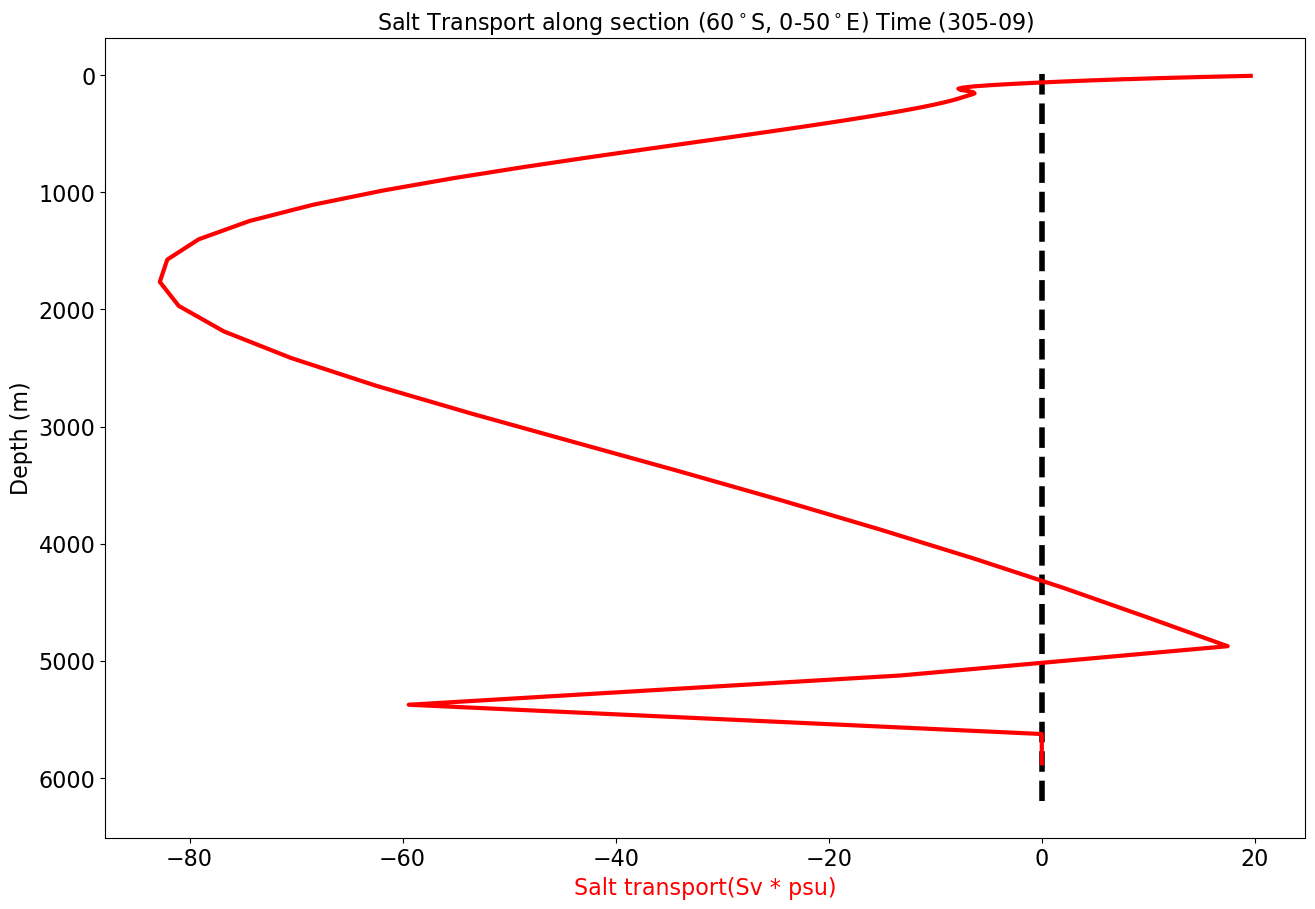

In [15]:
my_font = {'fontname':'Cambria', 'size':'16'}
# plot the result
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.plot(streamSV,A,'red',linewidth=3)
plt.ylabel('Depth (m)',**my_font)
plt.xlabel('Salt transport(Sv * psu)',color= 'red',**my_font)
plt.vlines(0, -10, 6200, colors = "k",linestyles = "dashed",linewidth=4)
plt.xticks(**my_font)
plt.yticks(**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Salt Transport along section (60$^\circ$S, 0-50$^\circ$E) Time (305-09)',**my_font)
plt.savefig("ST-1.png",bbox_inches='tight',dpi=fig.dpi)